In [1]:
#loa necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#load the dataset, copy to another, get a view of the data
data=pd.read_csv('Iris.csv')
df=data.copy()
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [ ]:
#descriptive statistics of the data
data.describe()

In [ ]:
#General info about the data,count, and dtypes
data.info()

In [3]:
#transform categorical variable and get a view
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data.tail()

In [5]:
#missing values check
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\GROUPHEADCV\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


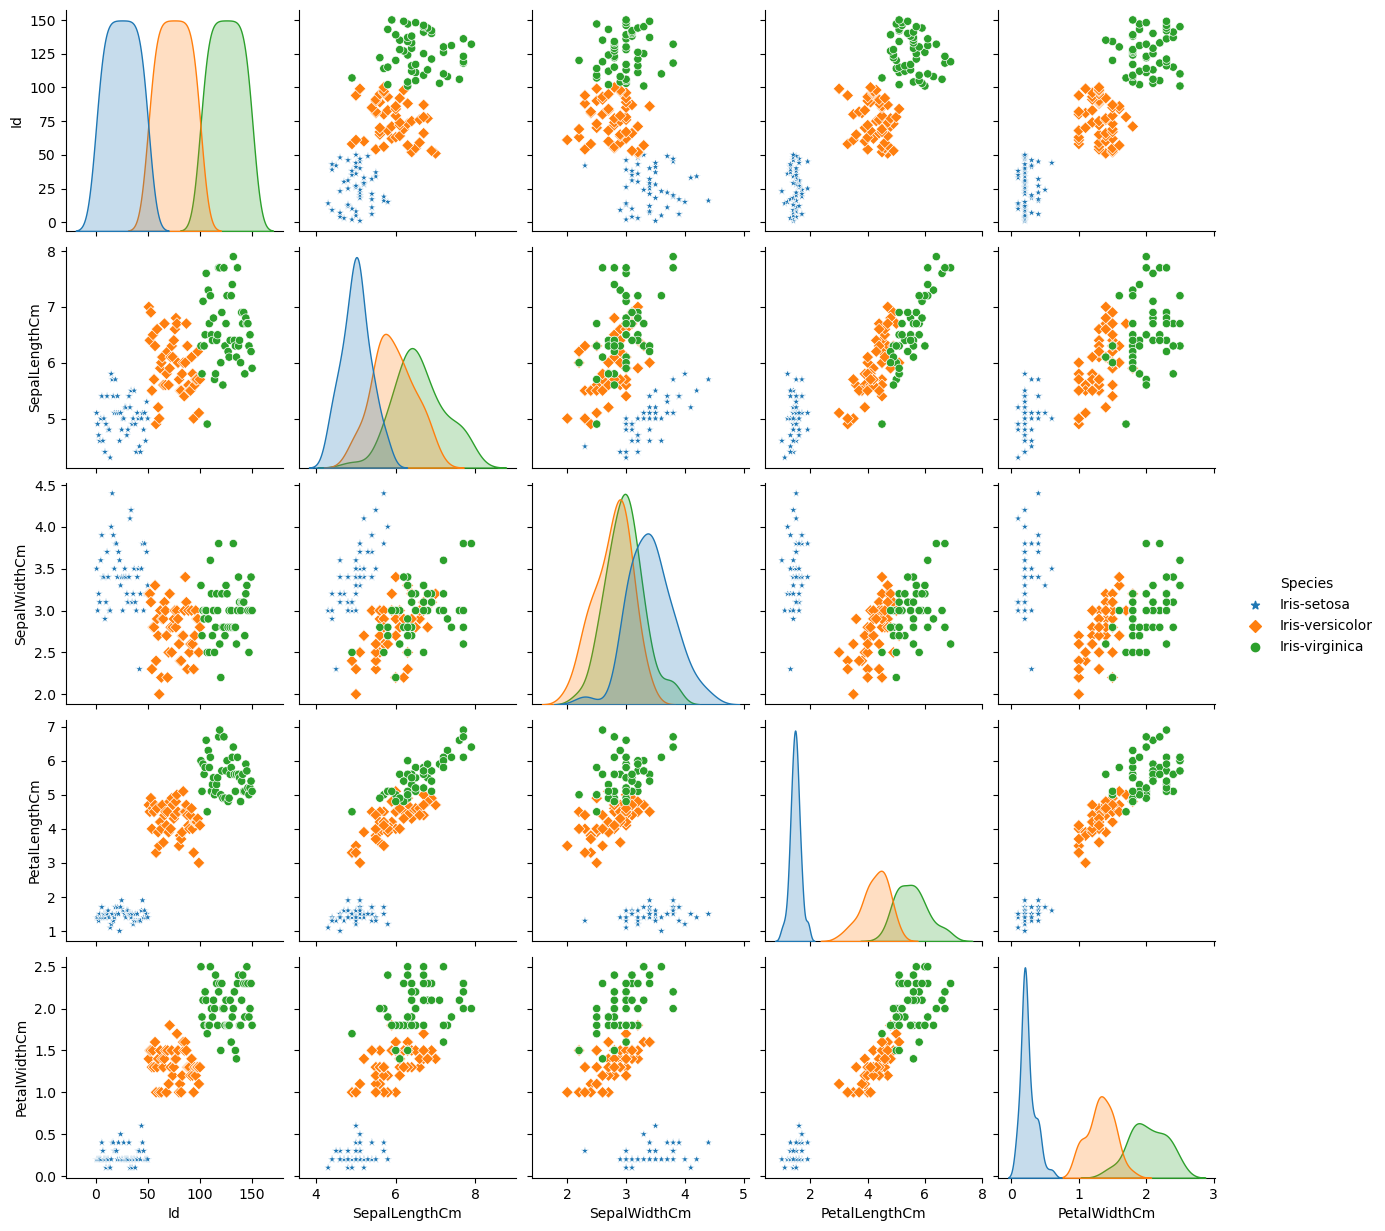

In [9]:
#overall visuals of the columns and distribution
sns.pairplot(df, hue='Species', markers=['*','D','o'])
plt.show()

In [8]:
#get the independent and target variables ready for training
X=data.drop(['Species','Id'],axis=1)
y= data.Species

In [10]:
#split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
#create dictionary of hyperparameters for hyperparameter tuning
params={
    'criterion': ("gini", "entropy", "log_loss"),
    'max_depth':(None, 5, 10, 15,),
    'max_features':(None, 5, 10, 15,25,50,30),
    'max_leaf_nodes':(None, 5, 10, 15,25),
    'random_state':(10, 15,30,42,100)
 }

In [12]:
#tuning timeeeeeeeeeee!!!specified njobs because all processors on deck
gscv=GridSearchCV(DecisionTreeClassifier(), params,n_jobs=-1,cv=5)
gscv.fit(x_train, y_train)
gscv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 10}

In [13]:
#the best score of all the tunings
gscv.best_score_

0.95

In [14]:
#now we create a decision tree classifier model with the given best parameters
model=DecisionTreeClassifier(criterion='gini',random_state=10)

In [15]:
#train the model and check accuracy score
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

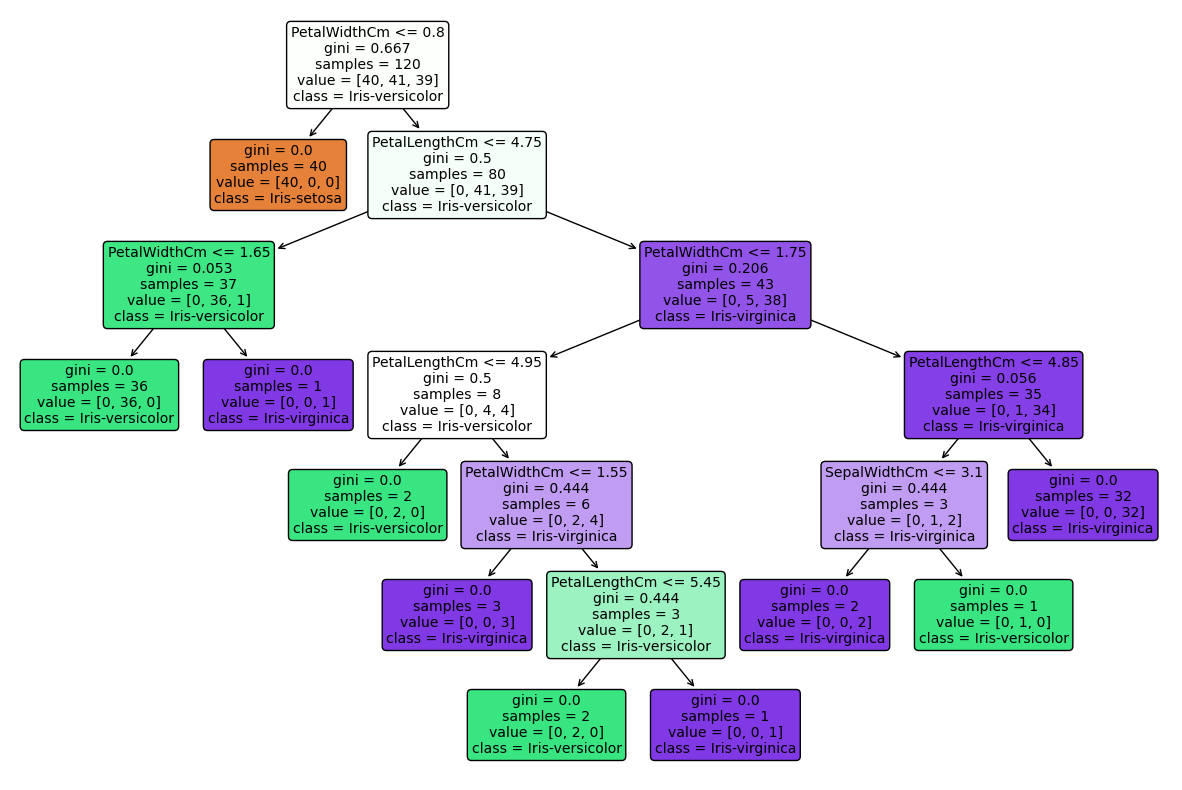

In [31]:
#visualize our decision tree
plt.figure(figsize=(15,10))
tree=plot_tree(model, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True,label='all',rounded=True)

In [36]:
#we will predict on the test set and evaluate our model's performance with more than accuracy
ypred=model.predict(x_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
#we might as well create a pruned decision tree
dt=DecisionTreeClassifier(ccp_alpha=0.02)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02)

In [39]:
#predict and evaluate it
ypred1=dt.predict(x_test)
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



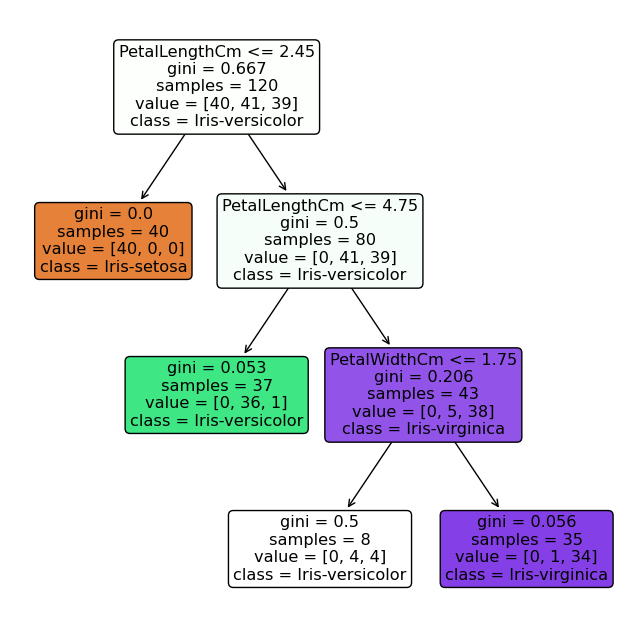

In [43]:
#visualizing the pruned decision tree
plt.figure(figsize=(8,8))
ree=plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True,label='all',rounded=True)